In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from pprint import pprint

file_to_load = "new_project_1.csv"

In [5]:
new_release_data = pd.read_csv(file_to_load)


In [31]:
very_popular = new_release_data.loc[new_release_data["popularity"]>= 90]
popularity_group = very_popular.groupby(["artist_name", "track_name"])

popularity_mean = popularity_group["popularity"].mean()
avg_popularity_df =pd.DataFrame(popularity_mean)
avg_popularity_df
sort_popularity_df = avg_popularity_df.sort_values("popularity", ascending = False)


popularity_chart = sort_popularity_df.plot(kind="barh")
plt.tight_layout()


TypeError: Cannot compare a Categorical for op __ge__ with a scalar, which is not a category.

In [30]:
sort_popularity_df 

,,popularity
artist_name,track_name,
The Weeknd,Blinding Lights,99
Jawsh 685,Savage Love (Laxed - Siren Beat),96
Powfu,death bed (coffee for your head),95
Ariana Grande,Stuck with U (with Justin Bieber),93
Juice WRLD,Wishing Well,93
StaySolidRocky,Party Girl,93
THE SCOTTS,THE SCOTTS,92
Drake,Toosie Slide,92
Juice WRLD,Come & Go (with Marshmello),92


In [8]:
least_popular = new_release_data.loc[new_release_data["popularity"]< 84]
unpopularity_group = least_popular.groupby(["artist_name", "track_name"])
unpopularity_mean = unpopularity_group["popularity"].mean()
avg_unpopularity_df =pd.DataFrame(unpopularity_mean)
sort_unpopularity_df = avg_unpopularity_df.sort_values("popularity", ascending = True)
sort_unpopularity_df

,,popularity
artist_name,track_name,
Polo G,Go Stupid,79
Morgan Wallen,More Than My Hometown,79
Tory Lanez,Broke In A Minute,80
J. Cole,The Climb Back,80
Megan Thee Stallion,Girls in the Hood,80
Polo G,Be Something (feat. Lil Baby),80
Diplo,Heartless (feat. Morgan Wallen),81
NLE Choppa,Shotta Flow 5,81
J. Cole,Lion King On Ice,81


C:\Users\Badison\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


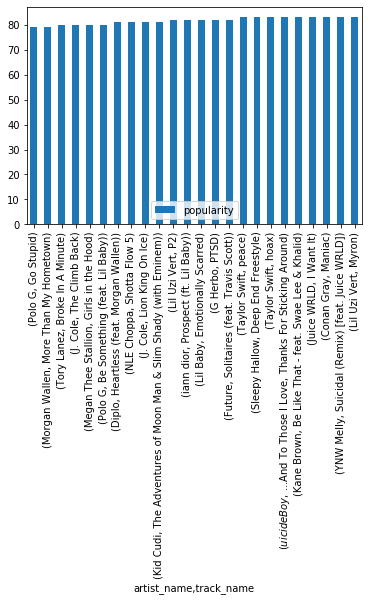

In [9]:
unpopularity_chart = sort_unpopularity_df.plot(kind="bar")
plt.tight_layout()

In [10]:
print(very_popular)

popular_count = popularity_group["artist_name"].count()
popular_count


      Unnamed: 0     artist_name                        track_name  \
0              0      Juice WRLD                      Wishing Well   
1              1      The Weeknd                   Blinding Lights   
2              2      Juice WRLD       Come & Go (with Marshmello)   
3              3  StaySolidRocky                        Party Girl   
6              6      THE SCOTTS                        THE SCOTTS   
...          ...             ...                               ...   
2452        2452       Jawsh 685  Savage Love (Laxed - Siren Beat)   
2455        2455         6ix9ine                             GOOBA   
2475        2475      The Weeknd                      In Your Eyes   
2484        2484         ROSALÍA          TKN (feat. Travis Scott)   
2487        2487        Anuel AA               Hasta Que Dios Diga   

                    track_id  popularity  
0     6o3QUC5oAE4g6WxRIFcZtb          93  
1     0VjIjW4GlUZAMYd2vXMi3b          99  
2     7y7w4tl4MaRC2UMEj1mPtr  

artist_name          track_name                           
6ix9ine              GOOBA                                    45
Anuel AA             Hasta Que Dios Diga                      13
Ariana Grande        Stuck with U (with Justin Bieber)        40
Chris Brown          Go Crazy                                 29
DJ Khaled            POPSTAR (feat. Drake)                    35
Drake                Toosie Slide                             31
Jawsh 685            Savage Love (Laxed - Siren Beat)         48
Juice WRLD           Come & Go (with Marshmello)               3
                     Wishing Well                              1
Lady Gaga            Rain On Me (with Ariana Grande)          44
Lil Mosey            Blueberry Faygo                          10
Marshmello           Be Kind (with Halsey)                    46
Megan Thee Stallion  Savage Remix (feat. Beyoncé)             17
Pop Smoke            The Woo (feat. 50 Cent & Roddy Ricch)    19
Powfu                death bed 

In [11]:
popular_count = popularity_group["artist_name"].count()
popular_count

popular_df = pd.DataFrame(popular_count)
popular_df["artist_name"].count()

21

In [12]:
popularity_mean.count()

21

In [19]:
# average_pop_bins = [0,19.9,39.9,59.9,79.9,100]
# bin_labels = ["<20","20-40","40-60","60-80","80-100"]

# artists_tracks = new_release_data.groupby(["artist_name", "track_name"])
# # total_average_popularities = artists_tracks["popularity"].mean()
# artists_counts = (new_release_data["artist_name"].value_counts())
# new_release_data["popularity"] = pd.cut(new_release_data["popularity"],average_pop_bins, labels=bin_labels)
# group_bin = new_release_data.groupby(["popularity"])

# total_popularity = new_release_data["popularity"].sum()

# bincount = group_bin["Popularity"].count()
# percentage = ((bincount/artist_counts)*100)

      Unnamed: 0     artist_name                        track_name  \
0              0      Juice WRLD                      Wishing Well   
1              1      The Weeknd                   Blinding Lights   
2              2      Juice WRLD       Come & Go (with Marshmello)   
3              3  StaySolidRocky                        Party Girl   
6              6      THE SCOTTS                        THE SCOTTS   
...          ...             ...                               ...   
2452        2452       Jawsh 685  Savage Love (Laxed - Siren Beat)   
2455        2455         6ix9ine                             GOOBA   
2475        2475      The Weeknd                      In Your Eyes   
2484        2484         ROSALÍA          TKN (feat. Travis Scott)   
2487        2487        Anuel AA               Hasta Que Dios Diga   

                    track_id  popularity  
0     6o3QUC5oAE4g6WxRIFcZtb          93  
1     0VjIjW4GlUZAMYd2vXMi3b          99  
2     7y7w4tl4MaRC2UMEj1mPtr  

Text(0, 0.5, 'Counts')

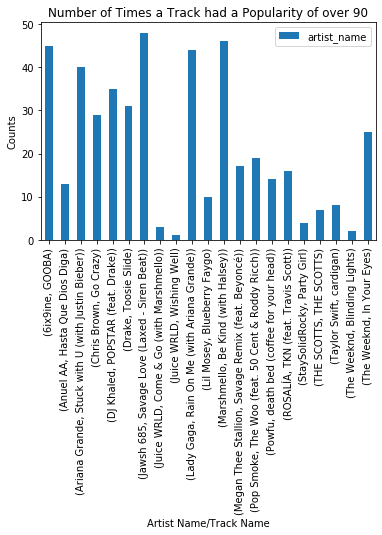

In [40]:
popular_count = popularity_group["artist_name"].count()
popular_df = pd.DataFrame(popular_count)
popular_df
print(very_popular)

popular_chart = popular_df.plot(kind ="bar", title= "Number of Times a Track had a Popularity of over 90")
popular_chart.set_xlabel("Artist Name/Track Name")
popular_chart.set_ylabel("Counts")